<a href="https://colab.research.google.com/github/Soujanya0506/RL_Mini_Projects/blob/main/rl_nagoya_participant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# define the position of the state
def get_state_all():
    state_all = np.array([
        [0, 1,  2,  3,  4],
        [5, 6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]
    ])
    sz = state_all.shape # shape of the state
    return state_all, sz

state_all, sz = get_state_all() # get the states and its shape
print(state_all)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [3]:
# define the function about how the agent should move
def agent_move_all(state, state_all, action_all):
    state_next_all = []

    if state == 1:
        state_next_all.extend([21, 21, 21, 21])
    elif state == 3:
        state_next_all.extend([13, 13, 13, 13])
    else:
        row, col = np.where(state_all == state)
        row, col = row[0], col[0]

        for action in action_all:
            row_next = row
            col_next = col

            if action == 'up':
                row_next -= 1
            elif action == 'right':
                col_next += 1
            elif action == 'down':
                row_next += 1
            elif action == 'left':
                col_next -= 1

            if 0 <= row_next < 5 and 0 <= col_next < 5:
                state_next_all.append(state_all[row_next, col_next])
            else:
                state_next_all.append(state)

    return state_next_all


In [4]:
state = 15 # initiate the position of agent
action_all = ['up', 'right', 'down', 'left']

state_next_all = agent_move_all(state, state_all, action_all)
print(state_next_all)

[10, 16, 20, 15]


In [5]:
def agent_reward_sum(state, state_all, action_all, action_prob):
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]
    reward_sum = 0

    for i, action in enumerate(action_all):
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        if state == 1:
            reward = 10
        elif state == 3:
            reward = 5
        elif 0 <= row_next < 5 and 0 <= col_next < 5:
            reward = 0
        else:
            reward = -1

        reward_sum += reward * action_prob[i]

    return reward_sum


In [6]:
state = 15
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

reward_sum = agent_reward_sum(state, state_all, action_all, action_prob)

print(reward_sum)

-0.25


## Dynamic Programming

In [7]:

def value_iteration(state_all, action_all, action_prob, theta=0.01, gamma=0.9):

    V = np.zeros_like(state_all, dtype=float)

    while True:
        delta = 0

        for state in state_all.flatten():
            v = V[np.where(state_all == state)]
            v_new = 0

            for i in range(len(action_all)):
                action, prob = action_all[i], action_prob[i]
                state_next_all = agent_move_all(state, state_all, action_all)
                reward_sum = agent_reward_sum(state, state_all, action_all, action_prob)

                # we assume state transition is deterministic
                v_new += prob * (reward_sum + gamma * V[np.where(state_all == state_next_all[action_all.index(action)])])

            V[np.where(state_all == state)] = v_new

            delta = max(delta, abs(v - v_new))

        if delta < theta:
            break

    return V


[[ 3.36248678  8.83465931  4.47150191  5.36317693  1.53395692]
 [ 1.57100098  3.03591059  2.29086393  1.94643698  0.58591221]
 [ 0.0987228   0.78069307  0.71260597  0.39602773 -0.36591309]
 [-0.92601545 -0.39332129 -0.3157776  -0.54811942 -1.14625484]
 [-1.81012954 -1.30313131 -1.19026029 -1.38552946 -1.93846733]]


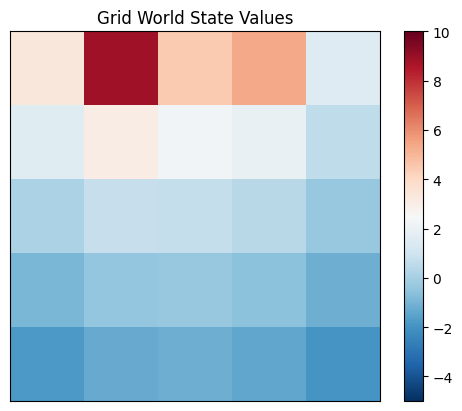

In [8]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

V = value_iteration(state_all, action_all, action_prob)

print(V)

# the values of V must be approximately
#[[ 3.36248678  8.83465931  4.47150191  5.36317693  1.53395692]
# [ 1.57100098  3.03591059  2.29086393  1.94643698  0.58591221]
# [ 0.0987228   0.78069307  0.71260597  0.39602773 -0.36591309]
# [-0.92601545 -0.39332129 -0.3157776  -0.54811942 -1.14625484]
# [-1.81012954 -1.30313131 -1.19026029 -1.38552946 -1.93846733]]

plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=-5, vmax=10)
plt.colorbar()
plt.title('Grid World State Values')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
def value_iteration_timeseries(state_all, action_all, action_prob, theta=0.01, gamma=0.9):
    V = np.zeros_like(state_all, dtype=float)
    Vs = [V.copy()]

    while True:
        delta = 0

        for state in state_all.flatten():
            v = V[np.where(state_all == state)]
            v_new = 0

            for i in range(len(action_all)):
                action, prob = action_all[i], action_prob[i]
                state_next_all = agent_move_all(state, state_all, action_all)
                reward_sum = agent_reward_sum(state, state_all, action_all, action_prob)

                v_new += prob * (reward_sum + gamma * V[np.where(state_all == state_next_all[action_all.index(action)])])

            V[np.where(state_all == state)] = v_new
            delta = max(delta, abs(v - v_new))

        Vs.append(V.copy())

        if delta < theta:
            break

    return Vs


(17, 5, 5)


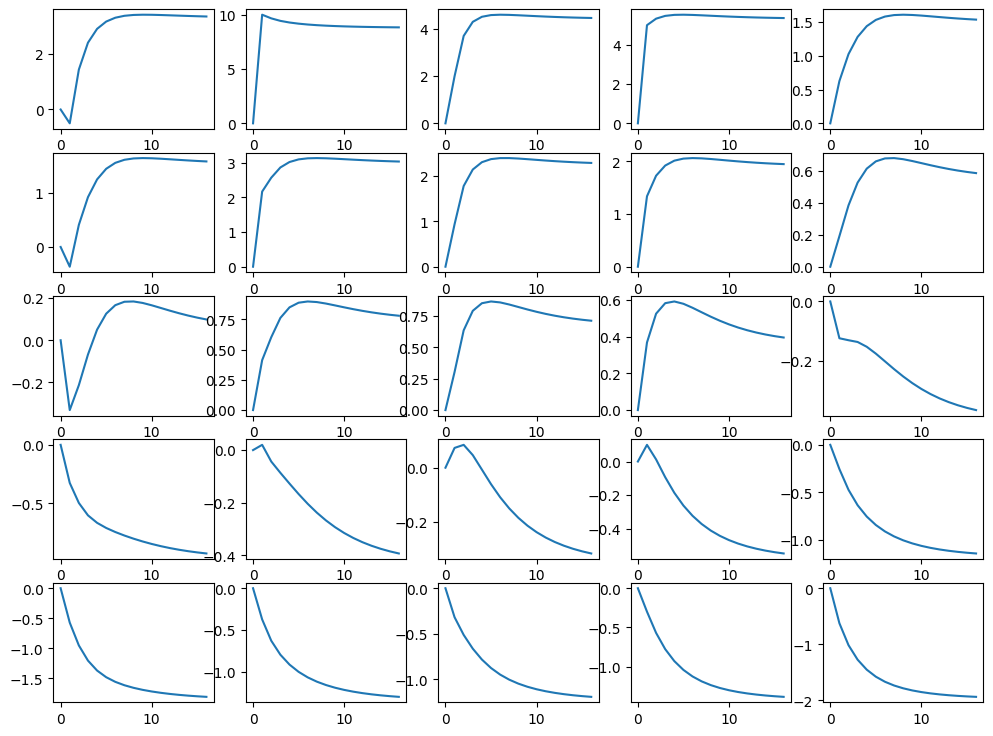

In [10]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

Vs = value_iteration_timeseries(state_all, action_all, action_prob)
print(np.array(Vs).shape)


fig = plt.figure(figsize=(12,9))

subplot_n =1
for col in range(5):
    for row in range(5):

        vs = []
        for t in range(np.array(Vs).shape[0]):
            v_t = Vs[t][col][row]
            vs.append(v_t)

        ax = fig.add_subplot(5, 5, subplot_n)
        ax.plot(vs)

        subplot_n +=1

## Monte Carlo Methods

In [11]:
from collections import defaultdict

def agent_reward(current_state, next_state):
    if current_state == 1:
        return 10
    elif current_state == 3:
        return 5
    elif current_state == next_state:
        return -1
    else:
        return 0
def monte_carlo_value_estimation(num_episodes, gamma=0.9):

    state_all, _ = get_state_all()
    V = np.zeros_like(state_all, dtype=float)
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state = np.random.choice(state_all.flatten())
        episode_path = []

        while True:
            action = np.random.choice(action_all)
            next_states = agent_move_all(state, state_all, action_all)
            next_state = next_states[action_all.index(action)]

            reward = agent_reward(state, next_state)
            episode_path.append((state, reward))

            state = next_state

            if len(episode_path) > 100:
                break

        G = 0
        visited_states = set()
        # compute value function for all episode path
        for t in reversed(range(len(episode_path))):
            state, reward = episode_path[t]
            G = gamma * G + reward

            if state not in visited_states:
                returns[state].append(G)
                row, col = np.where(state_all == state)
                V[row, col] = np.mean(returns[state])
                visited_states.add(state)

    return V


[[ 5.26597936  8.4536702   5.20992754  4.61409001  2.66787495]
 [ 2.50931121  3.27056452  2.50298547  1.6320878   1.15233819]
 [ 0.5670283   0.82842967  0.44690176 -0.14361428  0.25098637]
 [-0.26312279 -0.40910144 -0.40265859 -0.28540845 -0.30218274]
 [-0.51129465 -0.84116307 -0.54315454 -0.50851975 -0.45282267]]
Execution time: 6.46 seconds


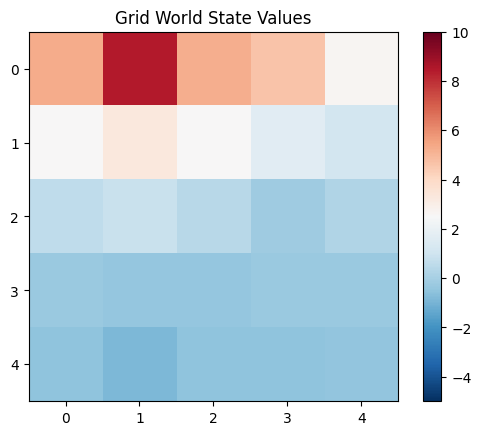

In [12]:
start_time = time.time()

number_of_episodes = 500
gamma = 0.9

V = monte_carlo_value_estimation(number_of_episodes, gamma)

end_time = time.time()

print(V)

elapsed_time = end_time - start_time
print(f"Execution time: {round(elapsed_time, 2)} seconds")


plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=-5, vmax=10)
plt.colorbar()
plt.title('Grid World State Values')
plt.show()


In [13]:
def td_value_estimation(num_episodes, gamma=0.9, alpha=0.1):
    state_all, _ = get_state_all()
    V = np.zeros_like(state_all, dtype=float)

    for episode in range(num_episodes):
        state = np.random.choice(state_all.flatten())

        for _ in range(100):
            action = np.random.choice(action_all)
            next_states = agent_move_all(state, state_all, action_all)
            next_state = next_states[action_all.index(action)]

            reward = agent_reward(state, next_state)

            row, col = np.where(state_all == state)
            next_row, next_col = np.where(state_all == next_state)

            V[row, col] += alpha * (reward + gamma * V[next_row, next_col] - V[row, col])

            state = next_state

    return V


[[ 5.1890634   8.71237833  4.39962637  5.52257218  0.98442925]
 [ 2.00433327  2.71896325  2.38254606  2.33875795  0.90521469]
 [ 0.48309331  0.71719014  0.44071009  0.54649455 -0.34027248]
 [-1.26650318 -0.69277012 -0.36348103 -0.66449449 -1.24107095]
 [-2.62160697 -1.82660014 -1.66835322 -1.42946488 -1.89220534]]
Execution time: 2.8 seconds


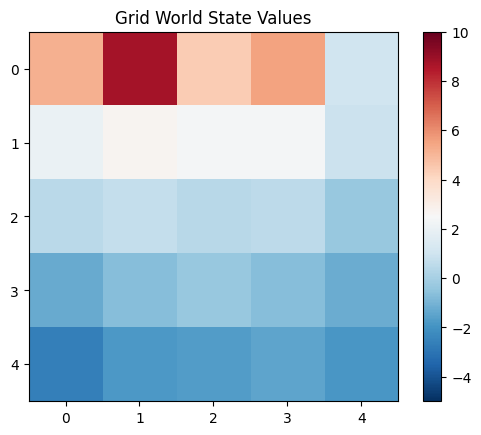

In [14]:
start_time = time.time()

number_of_episodes = 500
gamma = 0.9 # Discount factor
alpha = 0.1 # Learning rate
V = td_value_estimation(number_of_episodes, gamma, alpha)

end_time = time.time()

print(V)

elapsed_time = end_time - start_time
print(f"Execution time: {round(elapsed_time, 2)} seconds")

plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=-5, vmax=10)
plt.colorbar()
plt.title('Grid World State Values')
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

# Experiment with different episode numbers
episode_numbers = [100, 500, 1000, 5000, 10000]
td_results = {}
mc_results = {}

for num_episodes in episode_numbers:
    # TD Learning
    start_time = time.time()
    V_td = td_value_estimation(num_episodes)
    end_time = time.time()
    td_results[num_episodes] = {
        'V': V_td,
        'time': end_time - start_time
    }

    # Monte Carlo Method
    start_time = time.time()
    V_mc = monte_carlo_value_estimation(num_episodes)
    end_time = time.time()
    mc_results[num_episodes] = {
        'V': V_mc,
        'time': end_time - start_time
    }

# Print and visualize results
for num_episodes in episode_numbers:
    print(f"Results for {num_episodes} episodes:")

    print("TD Learning:")
    print(f"State Values (V):\n{td_results[num_episodes]['V']}")
    print(f"Computation Time: {round(td_results[num_episodes]['time'], 2)} seconds\n")

    print("Monte Carlo Method:")
    print(f"State Values (V):\n{mc_results[num_episodes]['V']}")
    print(f"Computation Time: {round(mc_results[num_episodes]['time'], 2)} seconds\n")


Results for 100 episodes:
TD Learning:
State Values (V):
[[ 4.57175081  8.81052654  5.51849027  5.66835993  2.45737507]
 [ 2.28141133  4.70757555  2.56265314  1.99976885  1.12648009]
 [ 0.65242206  1.70177365  1.13217429  0.69675554  0.43621391]
 [-0.95670692 -0.02932539 -0.22713123 -0.35177298 -0.87477964]
 [-1.99505879 -1.45066536 -0.92978749 -1.20298448 -1.59765456]]
Computation Time: 0.59 seconds

Monte Carlo Method:
State Values (V):
[[ 4.72870874e+00  8.62939424e+00  4.56620773e+00  4.27525449e+00
   2.24454395e+00]
 [ 2.91830612e+00  2.64852843e+00  2.33595808e+00  1.28152852e+00
   7.28592323e-01]
 [ 1.10651909e+00  5.17542888e-01  1.94694727e-01 -1.88818064e-01
  -9.04964572e-02]
 [ 3.33723471e-02 -3.60318623e-01 -5.03846831e-02  3.18651491e-01
   5.90139953e-03]
 [-2.93201353e-01 -7.72358813e-01 -4.30355838e-01 -3.76488322e-01
  -3.01848773e-01]]
Computation Time: 0.51 seconds

Results for 500 episodes:
TD Learning:
State Values (V):
[[ 3.38118685  8.97660742  4.64134681  5.1

## Q-learning

In [ ]:
def q_value_iteration(state_all, action_all, action_prob, theta=0.01, gamma=0.9):

    # Q-value dimension is (row: 5, column: 5, action: 4['up', 'right', 'down', 'left'])
    Q = np.zeros((*state_all.shape, len(action_all)))

    while True:
        delta = 0

        for state in state_all.flatten():
            row, col = np.where(state_all == state)

            for action_index, action in enumerate(action_all):
                q = Q[row, col, action_index]
                q_new = 0

                state_next_all = agent_move_all(state, state_all, action_all)

                next_state = state_next_all[action_index]

                reward = agent_reward(state, next_state) # compute reward

                q_new = reward + gamma * np.max(Q[np.where(state_all == next_state)])
                Q[row, col, action_index] = q_new

                delta = max(delta, abs(q - q_new))

        if delta < theta:
            break

    return Q

def agent_reward(current_state, next_state):

    if current_state == 1:
        return 10
    elif current_state == 3:
        return 5
    elif current_state == next_state:
        return -1
    else:
        return 0


In [ ]:
def plot_grid_world(Q, colorbar_scale=1.0):
    rows, cols, _ = Q.shape

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)

    ax.imshow(np.ones((rows*3, cols*3)) * -1, cmap='binary', vmin=-1, vmax=1)

    vmin = np.min(Q)
    vmax = np.max(Q)
    print('vmin', vmin, 'vmax', vmax)

    for row in range(rows):
        for col in range(cols):
            actions = Q[row, col]
            avg_value = np.mean(actions)

            ax.add_patch(plt.Rectangle((col*3 + 0.5, row*3-0.5), 1, 1, color=plt.cm.RdBu_r((actions[0] - vmin) / (vmax - vmin)))) # up
            ax.add_patch(plt.Rectangle((col*3 + 1.5, row*3 + 0.5), 1, 1, color=plt.cm.RdBu_r((actions[1] - vmin) / (vmax - vmin)))) # right
            ax.add_patch(plt.Rectangle((col*3 + 0.5, row*3 + 1.5), 1, 1, color=plt.cm.RdBu_r((actions[2] - vmin) / (vmax - vmin)))) # down
            ax.add_patch(plt.Rectangle((col*3-0.5, row*3 + 0.5), 1, 1, color=plt.cm.RdBu_r((actions[3] - vmin) / (vmax - vmin)))) # left
            ax.add_patch(plt.Rectangle((col*3 + 0.5, row*3 + 0.5), 1, 1, color=plt.cm.RdBu_r((avg_value - vmin) / (vmax - vmin))))

    ax.set_xticks(np.arange((cols*3)+1)-0.5, minor=True)
    ax.set_yticks(np.arange((rows*3)+1)-0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    fig.colorbar(plt.cm.ScalarMappable(cmap='RdBu_r'), ax=ax, orientation="vertical", pad=0.02, shrink=colorbar_scale)
    plt.show()


vmin 9.509466530519434 vmax 24.41409307463729


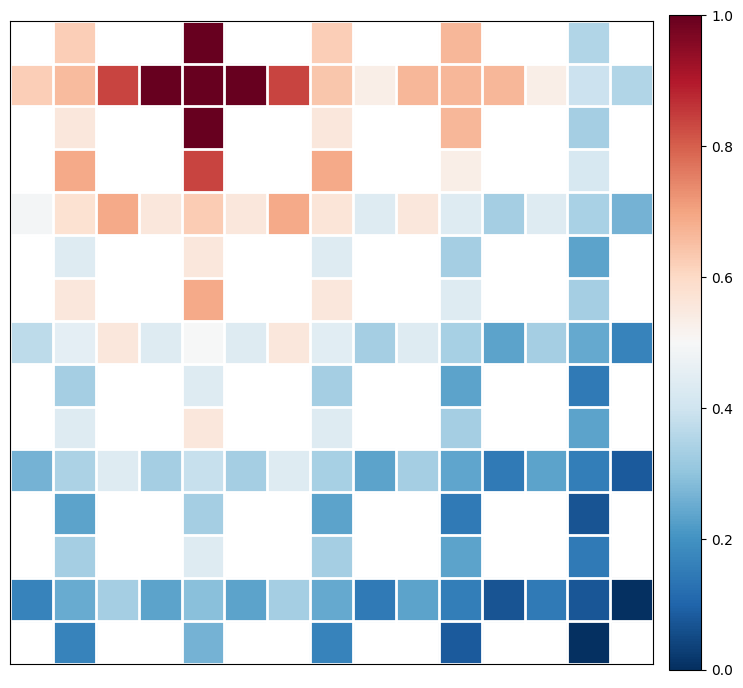

In [ ]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

Q = q_value_iteration(state_all, action_all, action_prob)
plot_grid_world(Q, colorbar_scale=0.85)

In [ ]:
def q_value_iteration_timeseries(state_all, action_all, action_prob, theta=0.01, gamma=0.9):

    Q = np.zeros((*state_all.shape, len(action_all)))
    Qs = [Q.copy()]

    while True:
        delta = 0

        for state in state_all.flatten():
            row, col = np.where(state_all == state)

            for action_index, action in enumerate(action_all):
                q = Q[row, col, action_index]
                q_new = 0

                state_next_all = agent_move_all(state, state_all, action_all)

                next_state = state_next_all[action_index]

                reward = agent_reward(state, next_state)

                q_new = reward + gamma * np.max(Q[np.where(state_all == next_state)])

                Q[row, col, action_index] = q_new
                delta = max(delta, abs(q - q_new))

        if delta < theta:
            break

        Qs.append(Q.copy())

    return Qs




In [ ]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

Qs = q_value_iteration_timeseries(state_all, action_all, action_prob)
print(np.array(Qs).shape)

(16, 5, 5, 4)


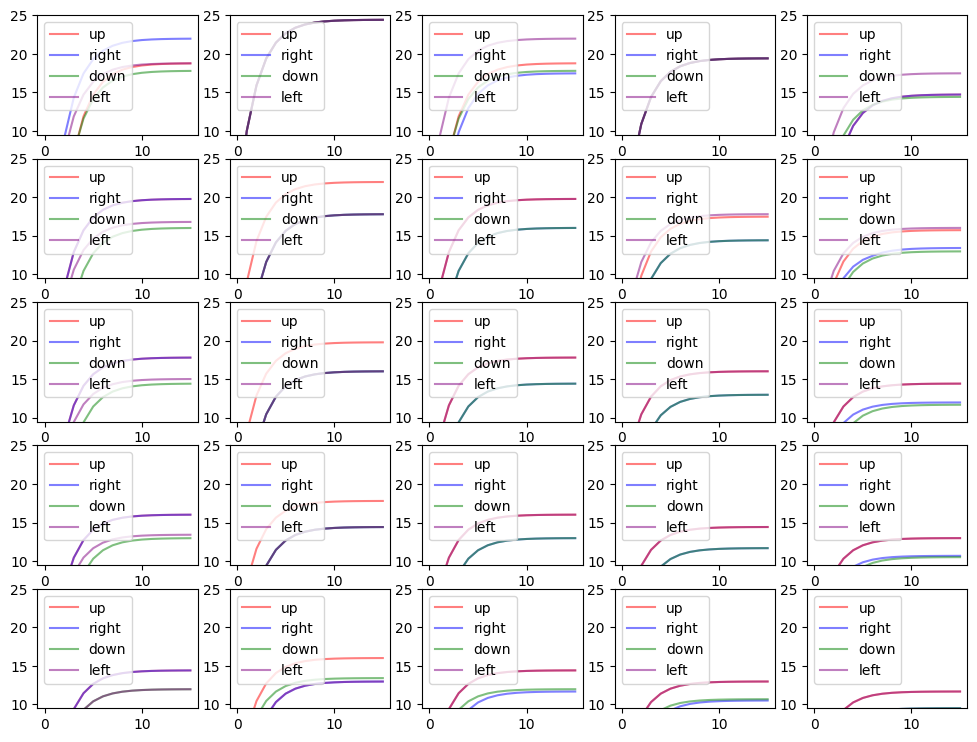

In [ ]:
fig = plt.figure(figsize=(12,9))
Qs = np.array(Qs)

subplot_n =1
for col in range(5):
    for row in range(5):

        Qs_up = []
        Qs_right = []
        Qs_down = []
        Qs_left = []
        for t in range(np.array(Qs).shape[0]):
            Q_t_up = Qs[t][col][row][0]
            Q_t_right = Qs[t][col][row][1]
            Q_t_down = Qs[t][col][row][2]
            Q_t_left = Qs[t][col][row][3]
            Qs_up.append(Q_t_up)
            Qs_right.append(Q_t_right)
            Qs_down.append(Q_t_down)
            Qs_left.append(Q_t_left)

        ax = fig.add_subplot(5, 5, subplot_n)

        ax.plot(Qs_up, color='red', label='up', alpha=0.5)
        ax.plot(Qs_right, color='blue', label='right', alpha=0.5)
        ax.plot(Qs_down, color='green', label='down', alpha=0.5)
        ax.plot(Qs_left, color='purple', label='left', alpha=0.5)

        ax.legend(loc='upper left')
        ax.set(ylim=(9.5, 25))

        subplot_n +=1


# Frozen lake Problem

###### Conditions: 4*4 matrix, initial state [0], Penalty_states[5,7,11,12], Reward_state [15]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time

Without Epsilon Greedy

In [34]:
def get_state_all():
    state_all = np.arange(1, 17).reshape(4, 4)
    sz = state_all.shape
    return state_all, sz

def agent_move_all(state, state_all, action_all):
    state_next_all = []
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]

    for action in action_all:
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        if 0 <= row_next < 4 and 0 <= col_next < 4:
            state_next_all.append(state_all[row_next, col_next])
        else:
            state_next_all.append(state)

    return state_next_all

def agent_reward(current_state, next_state):
    if current_state == 16:  # Reward state
        return 10
    elif current_state in [5, 7, 11, 12]:  # Penalty states
        return -10
    elif current_state == next_state:  # Hit a wall or boundary
        return -1
    else:  # Safe movement
        return 0

def agent_reward_sum(state, state_all, action_all, action_prob):
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]
    reward_sum = 0

    for i, action in enumerate(action_all):
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        # Get next state for this action
        state_next_all = agent_move_all(state, state_all, action_all)
        next_state = state_next_all[action_all.index(action)]

        # Calculate reward for this specific action
        reward = agent_reward(state, next_state)

        # Accumulate expected reward
        reward_sum += reward * action_prob[i]

    return reward_sum

def value_iteration(state_all, action_all, action_prob, theta=0.01, gamma=0.85):
    V = np.zeros_like(state_all, dtype=float)

    while True:
        delta = 0
        for state in state_all.flatten():
            v = V[np.where(state_all == state)]
            v_new = 0

            for i in range(len(action_all)):
                action, prob = action_all[i], action_prob[i]
                state_next_all = agent_move_all(state, state_all, action_all)
                reward_sum = agent_reward_sum(state, state_all, action_all, action_prob)

                # we assume state transition is deterministic
                v_new += prob * (reward_sum + gamma * V[np.where(state_all == state_next_all[action_all.index(action)])])

            V[np.where(state_all == state)] = v_new
            delta = max(delta, abs(v - v_new))

        if delta < theta:
            break

    return V

# Example usage
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]  # Equal probability for each action

V = value_iteration(state_all, action_all, action_prob)
print(V)

[[-14.19816752 -11.96679979 -13.35972162 -11.70859147]
 [-24.13238953 -15.63357019 -24.67599839 -15.98699721]
 [-12.56151595 -12.80537512 -24.09307839 -21.69443691]
 [ -8.45539427  -7.98222835  -7.15347109   6.73321681]]


[[-14.19816752 -11.96679979 -13.35972162 -11.70859147]
 [-24.13238953 -15.63357019 -24.67599839 -15.98699721]
 [-12.56151595 -12.80537512 -24.09307839 -21.69443691]
 [ -8.45539427  -7.98222835  -7.15347109   6.73321681]]


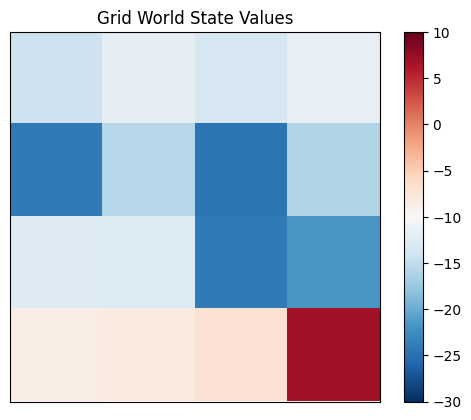

In [35]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

V = value_iteration(state_all, action_all, action_prob)

print(V)

# the values of V must be approximately
#[[ 3.36248678  8.83465931  4.47150191  5.36317693  1.53395692]
# [ 1.57100098  3.03591059  2.29086393  1.94643698  0.58591221]
# [ 0.0987228   0.78069307  0.71260597  0.39602773 -0.36591309]
# [-0.92601545 -0.39332129 -0.3157776  -0.54811942 -1.14625484]
# [-1.81012954 -1.30313131 -1.19026029 -1.38552946 -1.93846733]]

plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=-30, vmax=10)
plt.colorbar()
plt.title('Grid World State Values')
plt.xticks([])
plt.yticks([])
plt.show()

Epsilon Greedy method



In [28]:
import numpy as np
import random

# ... (other functions remain the same) ...

def value_iteration(state_all, action_all, theta=0.01, gamma=0.9, epsilon=0.1):
    V = np.zeros_like(state_all, dtype=float)

    while True:
        delta = 0
        for state in state_all.flatten():
            v = V[np.where(state_all == state)]
            v_new = 0

            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action_index = random.choice(range(len(action_all)))  # Exploration
                action = action_all[action_index]
                prob = 1.0 # deterministic
            else:
                # Get Q-values for the current state
                state_next_all = agent_move_all(state, state_all, action_all)
                Q_values = [agent_reward(state,next_s) + gamma * V[np.where(state_all == next_s)]
                            for next_s in state_next_all]
                # Find index of action with the highest value
                action_index = np.argmax(Q_values)
                action = action_all[action_index]
                prob = 1.0 # deterministic

            state_next_all = agent_move_all(state, state_all, action_all)
            reward_sum = agent_reward(state, state_next_all[action_all.index(action)])

            v_new += prob * (reward_sum + gamma * V[np.where(state_all == state_next_all[action_all.index(action)])])

            V[np.where(state_all == state)] = v_new
            delta = max(delta, abs(v - v_new))

        if delta < theta:
            break

    return V

# Example usage with epsilon-greedy
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']

V = value_iteration(state_all, action_all, epsilon=0.1, gamma=0.85) # Adjust epsilon and gamma
print(V)

[[25.14277801 29.57983113 28.65864363 33.71614363]
 [19.57983113 34.79989363 23.71614363 39.66614363]
 [34.79989363 40.94114363 38.16614363 46.66614363]
 [40.94114363 48.16614363 56.66614363 66.66614363]]


[[53.14304642 59.04794642 58.31894642 64.79894642]
 [49.04794642 65.60894642 54.79894642 71.99894642]
 [65.60894642 72.89894642 70.99894642 79.99894642]
 [72.89894642 80.99894642 89.99894642 99.99894642]]


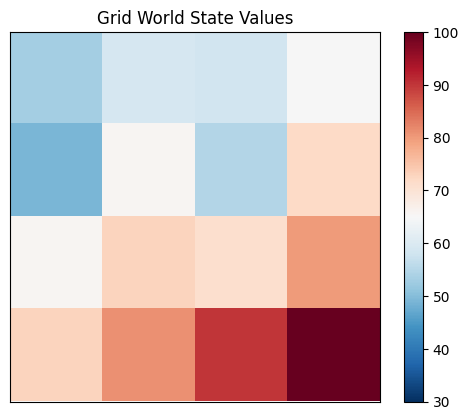

In [31]:
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']
action_prob = [0.25, 0.25, 0.25, 0.25]

V = value_iteration(state_all, action_all)

print(V)


plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=30, vmax=100)
plt.colorbar()
plt.title('Grid World State Values')
plt.xticks([])
plt.yticks([])
plt.show()

# Considering the case where the agent when steps on Lake starts over again

In [39]:
# Considering the case where the agent when steps on Lake starts over again

import numpy as np
import random

def get_state_all():
    state_all = np.arange(1, 17).reshape(4, 4)
    sz = state_all.shape
    return state_all, sz

def agent_move_all(state, state_all, action_all):
    state_next_all = []
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]

    for action in action_all:
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        if 0 <= row_next < 4 and 0 <= col_next < 4:
            next_state = state_all[row_next, col_next]
            # Check if next state is a penalty state (hole)
            if next_state in [5, 7, 11, 12]:
                state_next_all.append(1)  # Restart at initial state (1)
            else:
                state_next_all.append(next_state)
        else:
            state_next_all.append(state)  # Stay in current state if move is invalid

    return state_next_all

def agent_reward(current_state, next_state):
    if current_state == 16:  # Reward state
        return 10
    elif current_state in [5, 7, 11, 12]:  # Penalty states
        return -10
    elif current_state == next_state:  # Hit a wall or boundary
        return -1
    else:  # Safe movement
        return 0

def agent_reward_sum(state, state_all, action_all, action_prob):
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]
    reward_sum = 0

    for i, action in enumerate(action_all):
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        # Get next state for this action
        state_next_all = agent_move_all(state, state_all, action_all)
        next_state = state_next_all[action_all.index(action)]

        # Calculate reward for this specific action
        reward = agent_reward(state, next_state)

        # Accumulate expected reward
        reward_sum += reward * action_prob[i]

    return reward_sum

def value_iteration(state_all, action_all, theta=0.01, gamma=0.9, epsilon=0.1):
    V = np.zeros_like(state_all, dtype=float)

    while True:
        delta = 0
        for state in state_all.flatten():
            v = V[np.where(state_all == state)]
            v_new = 0

            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action_index = random.choice(range(len(action_all)))  # Exploration
                action = action_all[action_index]
                prob = 1.0 # deterministic
            else:
                # Get Q-values for the current state
                state_next_all = agent_move_all(state, state_all, action_all)
                Q_values = [agent_reward(state,next_s) + gamma * V[np.where(state_all == next_s)]
                            for next_s in state_next_all]
                # Find index of action with the highest value
                action_index = np.argmax(Q_values)
                action = action_all[action_index]
                prob = 1.0 # deterministic

            state_next_all = agent_move_all(state, state_all, action_all)
            reward_sum = agent_reward(state, state_next_all[action_all.index(action)])

            v_new += prob * (reward_sum + gamma * V[np.where(state_all == state_next_all[action_all.index(action)])])

            V[np.where(state_all == state)] = v_new
            delta = max(delta, abs(v - v_new))

        if delta < theta:
            break

    return V

# epsilon-greedy
state_all, _ = get_state_all()
action_all = ['up', 'right', 'down', 'left']

V = value_iteration(state_all, action_all, epsilon=0.1, gamma=0.85) # Adjust epsilon and gamma
print(V)


[[25.1220514  29.55910453 25.12523885 21.35645302]
 [19.55910453 34.77916703 19.56229197 21.35374369]
 [34.77916703 40.92041703 38.14541703 46.64541703]
 [40.92041703 48.14541703 56.64541703 66.64541703]]


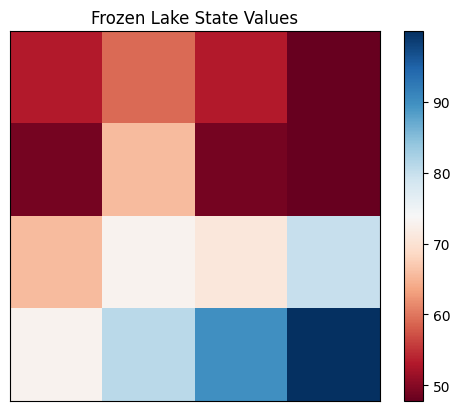

In [45]:
# Visualize the state values
plt.imshow(V, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.title('Frozen Lake State Values')
plt.xticks([])
plt.yticks([])
plt.show()

# Monte Carlo

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

# Define the environment (Frozen Lake)
def get_state_all():
    state_all = np.arange(16).reshape(4, 4)  # States 0 to 15
    sz = state_all.shape
    return state_all, sz

def agent_move_all(state, state_all, action_all):
    state_next_all = []
    row, col = np.where(state_all == state)
    row, col = row[0], col[0]

    for action in action_all:
        row_next = row
        col_next = col

        if action == 'up':
            row_next -= 1
        elif action == 'right':
            col_next += 1
        elif action == 'down':
            row_next += 1
        elif action == 'left':
            col_next -= 1

        if 0 <= row_next < 4 and 0 <= col_next < 4:
            state_next_all.append(state_all[row_next, col_next])
        else:
            state_next_all.append(state)

    return state_next_all

def agent_reward(current_state, next_state):
    if current_state == 15:  # Reward state (Goal)
        return 10
    elif current_state in [5, 7, 11, 12]:  # Penalty states (Holes)
        return -10
    elif current_state == next_state:  # Hit a wall or boundary
        return -1
    else:  # Safe movement
        return 0

# Monte Carlo Value Estimation with epsilon-greedy, exploring starts, and break condition
def monte_carlo_value_estimation(num_episodes, gamma=0.9, epsilon=0.1, delta_threshold=0.001):
    state_all, _ = get_state_all()
    V = np.zeros_like(state_all, dtype=float)
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state = np.random.choice(state_all.flatten())  # Exploring starts
        episode_path = []

        while state != 15 and state not in [5, 7, 11, 12]:  # Episode termination condition
            if np.random.rand() < epsilon:
                action = np.random.choice(action_all)  # Explore
            else:
                row, col = np.where(state_all == state)
                action_values = []  # Use a list to store action values
                for action_option in action_all:
                    next_states = agent_move_all(state, state_all, action_all)
                    next_state = next_states[action_all.index(action_option)]
                    action_values.append(agent_reward(state, next_state) + gamma * V[np.where(state_all == next_state)])  # Use the discounted future reward
                action = action_all[np.argmax(action_values)]  # Exploit

            next_states = agent_move_all(state, state_all, action_all)
            next_state = next_states[action_all.index(action)]
            reward = agent_reward(state, next_state)
            episode_path.append((state, reward))
            state = next_state
        return V
        # Calculate returns and update V (with break condition)
        G = 0
        visited_states = set()
        delta = 0  # Initialize delta (maximum change in state values)

        for t in reversed(range(len(episode_path))):
            state, reward = episode_path[t]
            G = gamma * G + reward

            if state not in visited_states:
                returns[state].append(G)
                row, col = np.where(state_all == state)
                old_v = V[row, col]  # Store the old value
                V[row, col] = np.mean(returns[state])
                delta = max(delta, np.abs(old_v - V[row, col]))  # Update delta
                visited_states.add

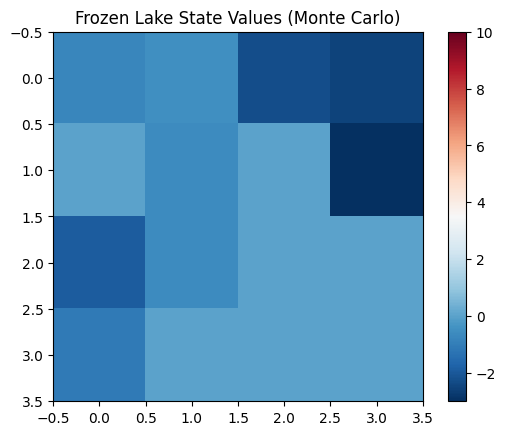

In [61]:
plt.imshow(V, cmap='RdBu_r', interpolation='nearest', vmin=-3, vmax=10)
plt.colorbar()  # Add a colorbar to show the value scale
plt.title('Frozen Lake State Values (Monte Carlo)')
plt.show()

Temporal Difference

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict


def td_value_estimation(num_episodes, gamma=0.95, alpha=0.05, epsilon=0.2, max_steps_per_episode = 100,epsilon_start=0.9, epsilon_decay=0.999):
    state_all, _ = get_state_all()
    V = np.zeros_like(state_all, dtype=float)

    for episode in range(num_episodes):
        state = np.random.choice(state_all.flatten())  # Exploring starts

        step_counter = 0
        while state != 15 and state not in [5, 7, 11, 12] and step_counter < max_steps_per_episode:
            if np.random.rand() < epsilon:
                action = np.random.choice(action_all)  # Explore
            else:
                row, col = np.where(state_all == state)
                action_values = []
                for action_option in action_all:
                    next_states = agent_move_all(state, state_all, action_all)
                    next_state = next_states[action_all.index(action_option)]
                    action_values.append(agent_reward(state, next_state) + gamma * V[np.where(state_all == next_state)])
                action = action_all[np.argmax(action_values)]  # Exploit
            step_counter += 1

            next_states = agent_move_all(state, state_all, action_all)
            next_state = next_states[action_all.index(action)]
            reward = agent_reward(state, next_state)

            # TD Update
            row, col = np.where(state_all == state)
            next_row, next_col = np.where(state_all == next_state)
            V[row, col] = V[row, col] + alpha * (reward + gamma * V[next_row, next_col] - V[row, col])

            state = next_state
    for episode in range(num_episodes):
      epsilon = epsilon_start * (epsilon_decay ** episode)  # Decay epsilon

    return V

# Example usage:
V_td = td_value_estimation(num_episodes=50000, gamma=0.9, alpha=0.1, epsilon=0.2)
print("TD State Values (V):\n", V_td)


TD State Values (V):
 [[-0.14125269 -0.21490977 -0.06125237 -0.34489292]
 [-0.05099663  0.         -0.000371    0.        ]
 [-0.02093269 -0.00767291 -0.00368338  0.        ]
 [ 0.         -0.00196432 -0.04086305  0.        ]]
